In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# 한글 폰트를 사용할 때 마이너스 부호가 깨져보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
data = np.random.randint(-100,100,50).cumsum()
data

array([ 44,  84, 102,  34,  55, 116,  78,  81, 108,  45,  31, 110,  91,
       148, 187,  99, 152, 142, 157, 121, 147, 123, 114,  30, 108, 106,
       157, 161, 217, 242, 269, 217, 128,  48, 132, 166, 247, 227, 216,
       296, 344, 336, 296, 306, 354, 260, 328, 405, 381, 298], dtype=int32)

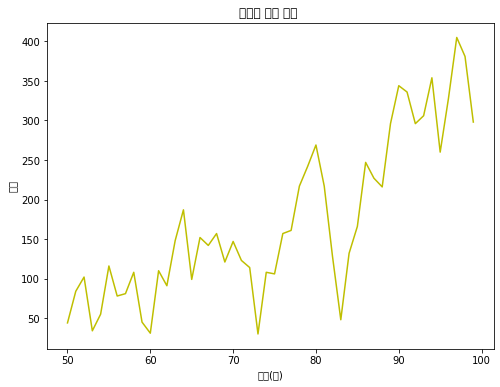

In [4]:
plt.figure(figsize=(8,6)) # 차트 크기 설정
# plt.rcParams['figure.figsize'] = (8,6) # 차트 크기 설정 
plt.plot(range(50,100),data ,'y')
plt.title('시간별 가격 추이 ') # 차트 제목 
plt.xlabel('시간(분)') # x축 제목
plt.ylabel('가격') # y축 제목
plt.show()

폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 설치된 위치 정보를 확인한다.

In [5]:
print('버전: ', mpl.__version__)
print('설치 경로: ', mpl.__file__)
print('설정 정보 경로 : ', mpl.get_configdir())
print('캐시 경로 : ', mpl.get_cachedir())

버전:  3.3.4
설치 경로:  c:\python\lib\site-packages\matplotlib\__init__.py
설정 정보 경로 :  C:\Users\ktym1\.matplotlib
캐시 경로 :  C:\Users\ktym1\.matplotlib


matplotlib의 설정위치 정보를 알았으니 설정 파일의 위치를 확인한다.

In [6]:
print('설정 파일 경로:',mpl.matplotlib_fname())

설정 파일 경로: c:\python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


컴퓨터에 설치된 폰트 목록을 얻어온다.

In [7]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

1512
['C:\\WINDOWS\\Fonts\\comic.ttf', 'C:\\Windows\\Fonts\\LeelUIsl.ttf', 'C:\\WINDOWS\\Fonts\\mriamc.ttf', 'C:\\Windows\\Fonts\\simsun.ttc', 'C:\\Windows\\Fonts\\ENBRODWY.TTF', 'C:\\Windows\\Fonts\\ENBODBKI.TTF', 'C:\\Windows\\Fonts\\BOD_BLAR.TTF', 'C:\\Windows\\Fonts\\VLADIMIR.TTF', 'C:\\Windows\\Fonts\\framdit.ttf', 'C:\\WINDOWS\\Fonts\\GillSansCondItNova.ttf']


In [8]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
print(f[:10])

1122
['DejaVu Sans Mono', 'DejaVu Serif Display', 'STIXNonUnicode', 'cmmi10', 'DejaVu Sans', 'STIXSizeFourSym', 'DejaVu Sans', 'DejaVu Serif', 'STIXGeneral', 'STIXSizeFourSym']


나눔 글꼴을 사용할 것이므로 폰트 이름에 'Nanum'이 포함된 폰트만 가져온다.

In [9]:
font_list = [(f.name, f.fname) for  f in fm.fontManager.ttflist if 'Nanum' in f.fname]
font_list

[('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic', 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'),
 ('NanumGothicCoding', 'C:\\WINDOWS\\Fonts\\NanumGothicCoding-Bold.ttf'),
 ('NanumGothicCoding', 'C:\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'),
 ('NanumGothicCoding', 'C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf')]

폰트를 설치했는데 위의 코드를 실행한 결과가 []만 나오거나 설치한 폰트가 보이지 않는다면 캐시 폴더로 이동해 폴더의 모든 내용을 삭제한 후 다시 실행하면 폰트 목록이 정상적으로 보인다.

In [10]:
mpl.font_manager._rebuild()

한글 폰트를 사용하도록 설정하는 방법은 3가지가 있다.  

<1> FontProPerties를 사용하는 방법 =>  그래프에 폰트가 필요한 항목마다 개별적으로 지정한다.

In [11]:
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 해당 폰트가 적용된다.
# matplotlib.pyplot => title(), xlabel(), ylabel(), legend(), text()
# matplotlib.axes => set_title()

font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font ,size=15)

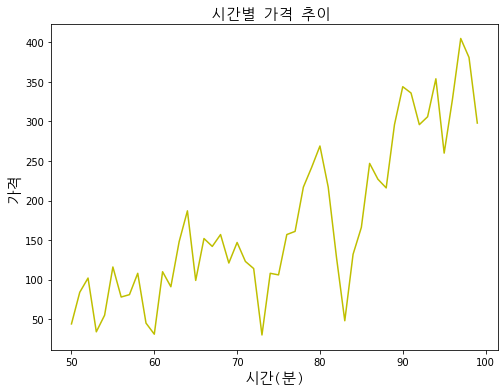

In [12]:
plt.figure(figsize=(8,6)) 
plt.plot(range(50,100),data ,'y')
plt.title('시간별 가격 추이 ',fontproperties=fontprop)
plt.xlabel('시간(분)',fontproperties=fontprop) 
plt.ylabel('가격',fontproperties=fontprop)                                                             
plt.show()

<2> maplotlib 라이브러리의 rcParams[]로 전역 글꼴 설정 => 그래프의 폰트 설정이 필요한 파일마다 지정한다 .

In [13]:
# matplotlib 폰트 기본 설정정보 읽기
print(' 기본으로 설정된 폰트이름: ' ,plt.rcParams['font.family'])
print(' 기본으로 설정된 폰트이름: ' ,plt.rcParams['font.size'])

 기본으로 설정된 폰트이름:  ['sans-serif']
 기본으로 설정된 폰트이름:  10.0


In [14]:
# 2-1 
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15

In [15]:
print(' 변경된 폰트 이름: ' ,plt.rcParams['font.family'])
print(' 변경된 폰트 크기: ' ,plt.rcParams['font.size'])

 변경된 폰트 이름:  ['NanumGothicCoding']
 변경된 폰트 크기:  15.0


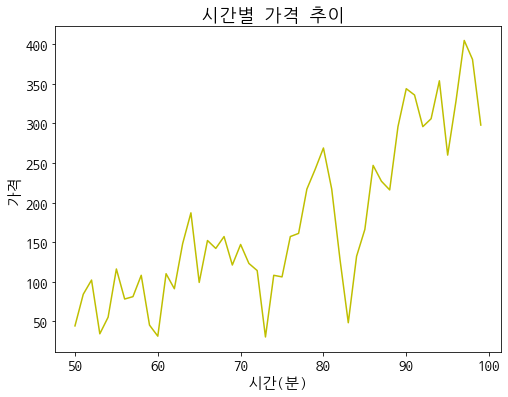

In [16]:
plt.figure(figsize=(8,6)) 
plt.plot(range(50,100),data ,'y')
plt.title('시간별 가격 추이 ')
plt.xlabel('시간(분)')
plt.ylabel('가격')
plt.show()

In [17]:
# 2-2 
# rcParams 대신 FontProperties의 plt.rc를 사용하는 방법이 있다 .
font = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname= font, size =15).get_name()
print(font_name)
plt.rc('font', family=font_name)
plt.rc('font', size= 15)

NanumGothicCoding


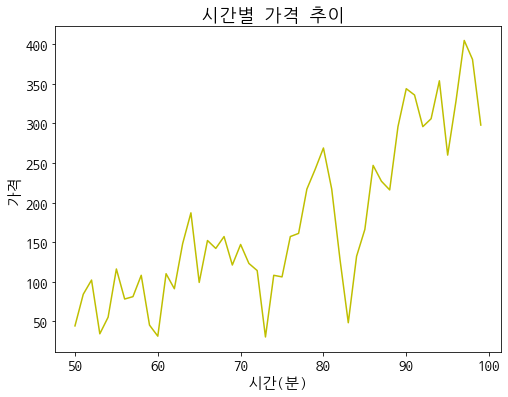

In [18]:
plt.figure(figsize=(8,6)) 
plt.plot(range(50,100),data ,'y')
plt.title('시간별 가격 추이 ')
plt.xlabel('시간(분)')
plt.ylabel('가격')
plt.show()

<3> 폰트 설정 정보를 matplotlibrc 파일에 직접 넣어준다  => 그래프가 필요한 컴퓨터 단위로 지정한다.

In [19]:
# mpl.matplotlib_fname() 를 실행하면 출력되는 경로의 matplotlibrc 파일을 수정한다
# matplotlibrc 파일을 수정하면 쥬피터 노트북을 실행할때 마다 별도의 설정 없이 matplotlibrc 파일의 설정을 사용한다.
print(mpl.matplotlib_fname())
# font.family:  sans-serif => NanumGothicCoding

c:\python\lib\site-packages\matplotlib\mpl-data\matplotlibrc


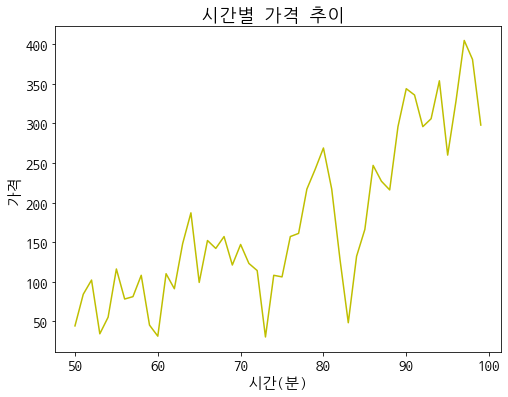

In [20]:
plt.figure(figsize=(8,6)) 
plt.plot(range(50,100),data ,'y')
plt.title('시간별 가격 추이 ')
plt.xlabel('시간(분)')
plt.ylabel('가격')
plt.show()